In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\dasar.SELVAMDG\\Desktop\\p\\Logistic_Regression'

In [3]:
data_open = sns.load_dataset('titanic')
data_open.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
dataset = data_open
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
dataset.shape

(891, 15)

## dataPreprocessing

In [6]:
dataset.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
dataset.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
# age is missing value less than 25%

<Axes: >

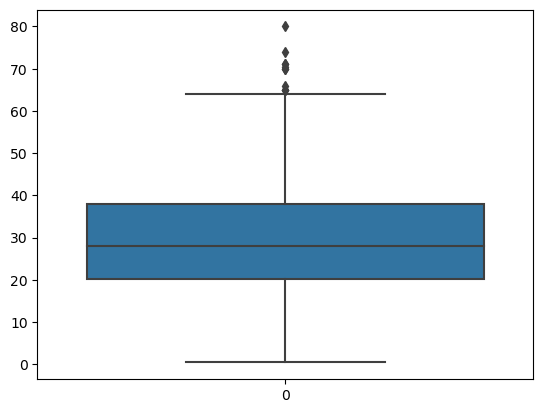

In [10]:
sns.boxplot(dataset["age"])

In [11]:
dataset['age'] = dataset['age'].fillna(dataset['age'].median())

In [12]:
dataset.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [13]:
# deck varaible is almost 75% missing data value
#  so drop the column
dataset= dataset.drop(['deck'], axis=1)
dataset.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [14]:
dataset['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [15]:
dataset['embarked'] = dataset['embarked'].fillna('S')
dataset.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [16]:
dataset['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [17]:
# embarked amd embark_town are same variable. so drop one column
dataset = dataset.drop(['embark_town'], axis=1)
dataset.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   survived    891 non-null    bool 
 1   pclass      891 non-null    bool 
 2   sex         891 non-null    bool 
 3   age         891 non-null    bool 
 4   sibsp       891 non-null    bool 
 5   parch       891 non-null    bool 
 6   fare        891 non-null    bool 
 7   embarked    891 non-null    bool 
 8   class       891 non-null    bool 
 9   who         891 non-null    bool 
 10  adult_male  891 non-null    bool 
 11  alive       891 non-null    bool 
 12  alone       891 non-null    bool 
dtypes: bool(13)
memory usage: 11.4 KB


In [18]:
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True


In [19]:
dataset['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [20]:
dataset['alive'].value_counts()

no     549
yes    342
Name: alive, dtype: int64

In [21]:
dataset.describe(include='O')

,sex,embarked,who,alive
count,891,891,891,891
unique,2,3,3,2
top,male,S,man,no
freq,577,646,537,549


In [22]:
dataset['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [23]:
dataset['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [24]:
#
#dataset contain repeated colums variables so drop the variables to prevent the multicollinearity

dataset = dataset.drop(['alive', 'pclass'], axis=1)


In [25]:
dataset.head()

,survived,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,1,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,0,male,35.0,0,0,8.0500,S,Third,man,True,True


In [26]:
# alone is similar if you know the values of sibsp and parch
dataset= dataset.drop(['alone'], axis=1)

In [27]:
dataset.head(10)

,survived,sex,age,sibsp,parch,fare,embarked,class,who,adult_male
0,0,male,22.0,1,0,7.2500,S,Third,man,True
1,1,female,38.0,1,0,71.2833,C,First,woman,False
2,1,female,26.0,0,0,7.9250,S,Third,woman,False
3,1,female,35.0,1,0,53.1000,S,First,woman,False
4,0,male,35.0,0,0,8.0500,S,Third,man,True
5,0,male,28.0,0,0,8.4583,Q,Third,man,True
6,0,male,54.0,0,0,51.8625,S,First,man,True
7,0,male,2.0,3,1,21.0750,S,Third,child,False
8,1,female,27.0,0,2,11.1333,S,Third,woman,False
9,1,female,14.0,1,0,30.0708,C,Second,child,False


In [28]:
# adult_male is similar to who and who is similar to sex and age
# Fare is nonsignificant variable to survive or not
#  so drop the columns

dataset= dataset.drop(['who','adult_male','fare'], axis=1)

In [29]:
dataset.head()

,survived,sex,age,sibsp,parch,embarked,class
0,0,male,22.0,1,0,S,Third
1,1,female,38.0,1,0,C,First
2,1,female,26.0,0,0,S,Third
3,1,female,35.0,1,0,S,First
4,0,male,35.0,0,0,S,Third


In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   sex       891 non-null    object  
 2   age       891 non-null    float64 
 3   sibsp     891 non-null    int64   
 4   parch     891 non-null    int64   
 5   embarked  891 non-null    object  
 6   class     891 non-null    category
dtypes: category(1), float64(1), int64(3), object(2)
memory usage: 42.9+ KB


In [31]:
dataset['sex'] = dataset['sex'].astype('category')
dataset['sex'] = dataset['sex'].cat.codes
dataset.head()

,survived,sex,age,sibsp,parch,embarked,class
0,0,1,22.0,1,0,S,Third
1,1,0,38.0,1,0,C,First
2,1,0,26.0,0,0,S,Third
3,1,0,35.0,1,0,S,First
4,0,1,35.0,0,0,S,Third


In [32]:
dataset['embarked'] = dataset['embarked'].astype('category')
dataset['embarked'] = dataset['embarked'].cat.codes
dataset.head(10)

,survived,sex,age,sibsp,parch,embarked,class
0,0,1,22.0,1,0,2,Third
1,1,0,38.0,1,0,0,First
2,1,0,26.0,0,0,2,Third
3,1,0,35.0,1,0,2,First
4,0,1,35.0,0,0,2,Third
5,0,1,28.0,0,0,1,Third
6,0,1,54.0,0,0,2,First
7,0,1,2.0,3,1,2,Third
8,1,0,27.0,0,2,2,Third
9,1,0,14.0,1,0,0,Second


In [33]:
dataset = pd.get_dummies(dataset, columns=['embarked'])
dataset.head()

,survived,sex,age,sibsp,parch,class,embarked_0,embarked_1,embarked_2
0,0,1,22.0,1,0,Third,0,0,1
1,1,0,38.0,1,0,First,1,0,0
2,1,0,26.0,0,0,Third,0,0,1
3,1,0,35.0,1,0,First,0,0,1
4,0,1,35.0,0,0,Third,0,0,1


In [34]:
dataset = dataset.drop(['embarked_0'], axis=1)
dataset.head()

,survived,sex,age,sibsp,parch,class,embarked_1,embarked_2
0,0,1,22.0,1,0,Third,0,1
1,1,0,38.0,1,0,First,0,0
2,1,0,26.0,0,0,Third,0,1
3,1,0,35.0,1,0,First,0,1
4,0,1,35.0,0,0,Third,0,1


In [35]:
dataset['class'] = dataset['class'].astype('category')
dataset['class'] = dataset['class'].cat.codes
dataset.head(10)

,survived,sex,age,sibsp,parch,class,embarked_1,embarked_2
0,0,1,22.0,1,0,2,0,1
1,1,0,38.0,1,0,0,0,0
2,1,0,26.0,0,0,2,0,1
3,1,0,35.0,1,0,0,0,1
4,0,1,35.0,0,0,2,0,1
5,0,1,28.0,0,0,2,1,0
6,0,1,54.0,0,0,0,0,1
7,0,1,2.0,3,1,2,0,1
8,1,0,27.0,0,2,2,0,1
9,1,0,14.0,1,0,1,0,0


In [36]:
dataset = pd.get_dummies(dataset, columns = ['class'])
dataset.head()

,survived,sex,age,sibsp,parch,embarked_1,embarked_2,class_0,class_1,class_2
0,0,1,22.0,1,0,0,1,0,0,1
1,1,0,38.0,1,0,0,0,1,0,0
2,1,0,26.0,0,0,0,1,0,0,1
3,1,0,35.0,1,0,0,1,1,0,0
4,0,1,35.0,0,0,0,1,0,0,1


In [37]:
dataset = dataset.drop(['class_0'], axis = 1)
dataset.head()

,survived,sex,age,sibsp,parch,embarked_1,embarked_2,class_1,class_2
0,0,1,22.0,1,0,0,1,0,1
1,1,0,38.0,1,0,0,0,0,0
2,1,0,26.0,0,0,0,1,0,1
3,1,0,35.0,1,0,0,1,0,0
4,0,1,35.0,0,0,0,1,0,1


In [38]:
dataset['age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [39]:
# feature scaling not required because all varibales are binary values and age variable is also a range from 0 to 80

In [40]:
dataset['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [41]:
# majority < 2* minority then the dataset is balance dataset

<Axes: >

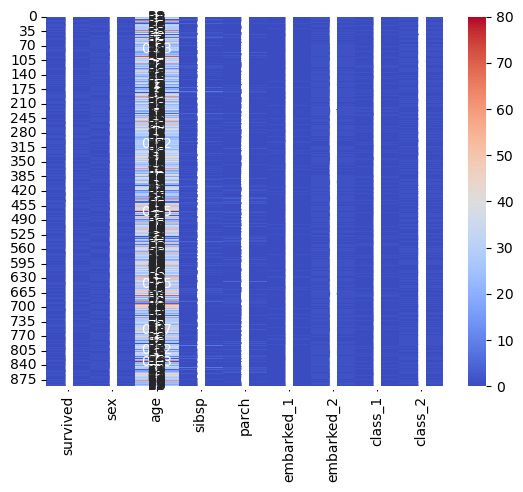

In [42]:
sns.heatmap(dataset, annot= True, cmap = 'coolwarm')

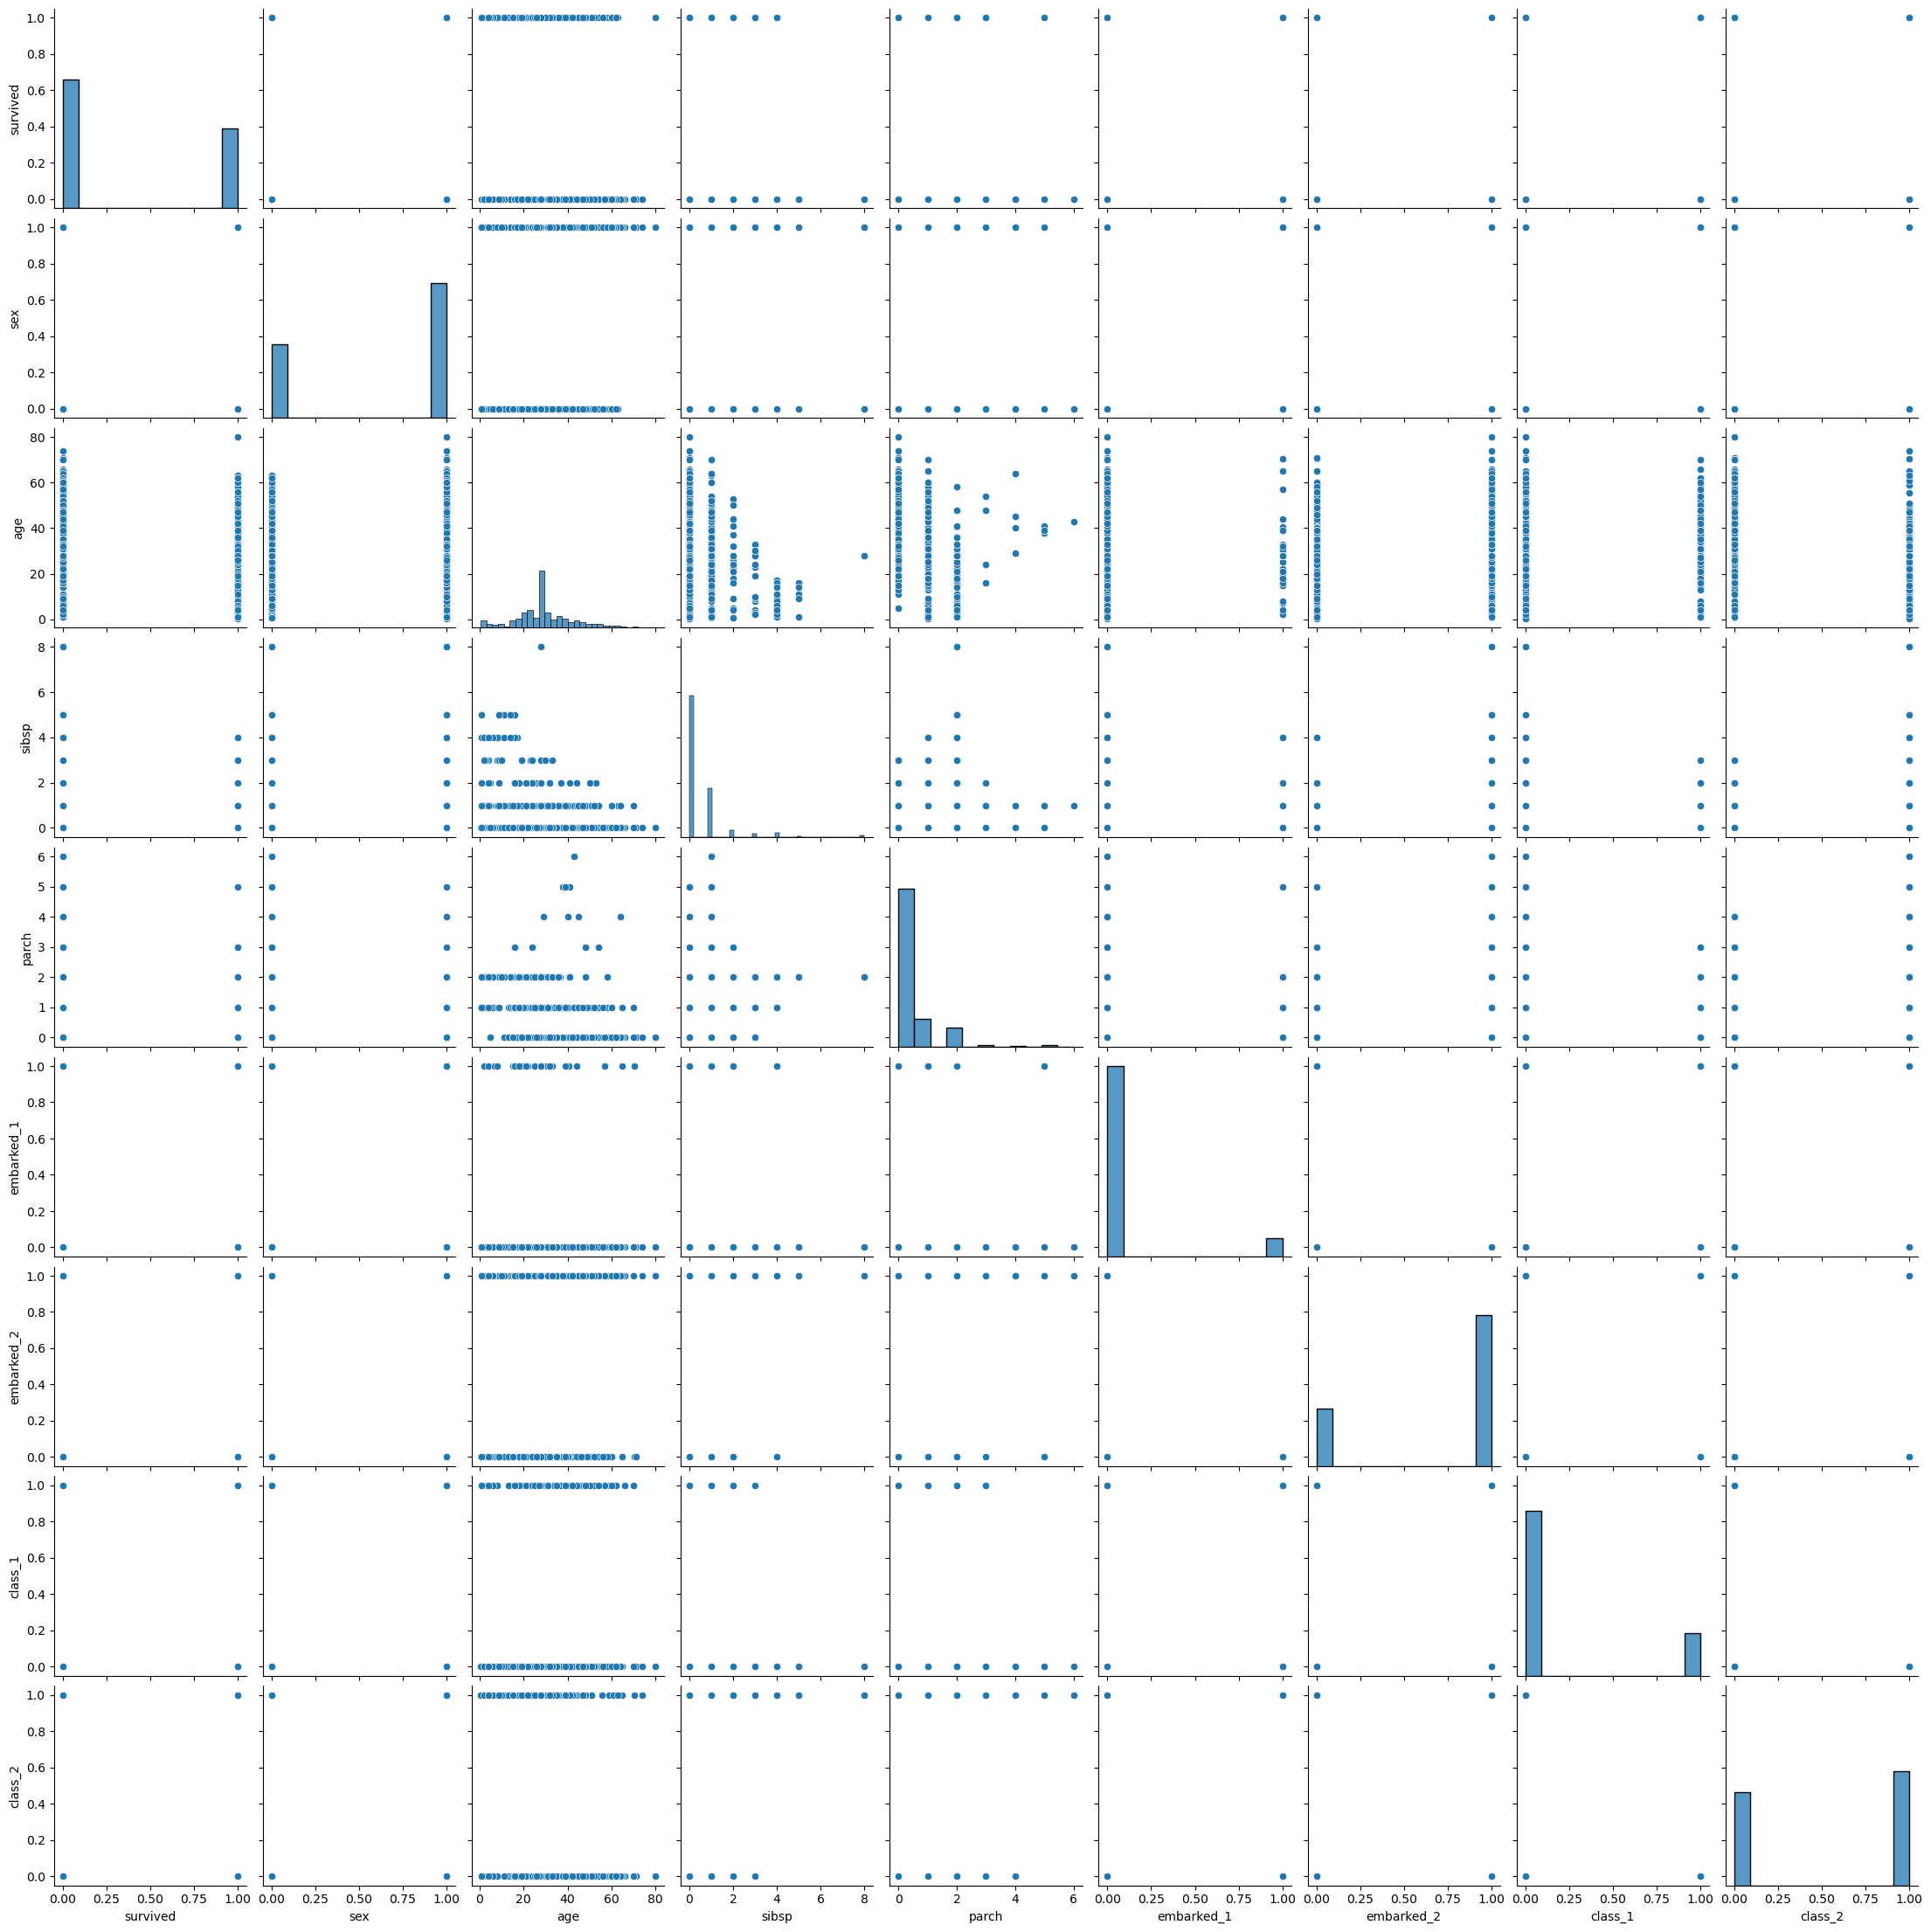

In [43]:
sns.pairplot(dataset)

In [44]:
dataset.head()

,survived,sex,age,sibsp,parch,embarked_1,embarked_2,class_1,class_2
0,0,1,22.0,1,0,0,1,0,1
1,1,0,38.0,1,0,0,0,0,0
2,1,0,26.0,0,0,0,1,0,1
3,1,0,35.0,1,0,0,1,0,0
4,0,1,35.0,0,0,0,1,0,1


In [45]:
# split the dataset into dependent and independent variables
x = dataset.iloc[:,1:].values
y = dataset['survived'].values

In [46]:
x

array([[ 1., 22.,  1., ...,  1.,  0.,  1.],
       [ 0., 38.,  1., ...,  0.,  0.,  0.],
       [ 0., 26.,  0., ...,  1.,  0.,  1.],
       ...,
       [ 0., 28.,  1., ...,  1.,  0.,  1.],
       [ 1., 26.,  0., ...,  0.,  0.,  0.],
       [ 1., 32.,  0., ...,  0.,  0.,  1.]])

In [47]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [48]:
#split the dataset into train and test data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.75, random_state=1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(668, 8)
(668,)
(223, 8)
(223,)


# Build Logistic Regression model

In [49]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)

LogisticRegression()

In [50]:
y_predict= logit_model.predict(x_test)

In [51]:
y_predict

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0], dtype=int64)

In [52]:
y_test

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1], dtype=int64)

In [53]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [54]:
print(confusion_matrix(y_test,y_predict))

[[114  14]
 [ 29  66]]


In [55]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       128
           1       0.82      0.69      0.75        95

    accuracy                           0.81       223
   macro avg       0.81      0.79      0.80       223
weighted avg       0.81      0.81      0.80       223



In [56]:
print(accuracy_score(y_test,y_predict))

0.8071748878923767


In [57]:
# test result is 81%

In [58]:
y_pred_train = logit_model.predict(x_train)

In [59]:
y_pred_train

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,

In [60]:
accuracy_score(y_train,y_pred_train)

0.8098802395209581

In [61]:
# check overfit or underfit of the model by checking the model with train data.
#test result = 80.71%
# trainign result = 80.9%

In [64]:
from sklearn.metrics  import roc_auc_score
logistic_roc_auc = roc_auc_score(y_test, y_predict)
logistic_roc_auc

0.7926809210526315

In [63]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test,y_predict)
display(fpr[:10])
display(tpr[:10])
display(threshold[:10])


array([0.      , 0.109375, 1.      ])

array([0.        , 0.69473684, 1.        ])

array([2, 1, 0], dtype=int64)

## plotting ROC and AUC

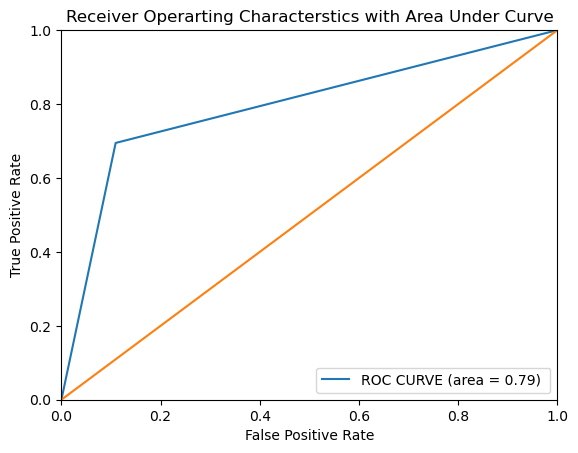

In [65]:
plt.figure()
plt.plot(fpr,tpr,label = "ROC CURVE (area = %0.2f) " % logistic_roc_auc)
plt.plot([0,1,],[0,1])
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operarting Characterstics with Area Under Curve")
plt.legend(loc = 'lower right')
plt.show()

In [67]:
from sklearn.model_selection import cross_val_score
accuracy_training = cross_val_score(logit_model, x_train, y_train, cv=10)
accuracy_test = cross_val_score(logit_model,x_test,y_test,cv=10)
print(accuracy_training)
print("*"*20)
print(accuracy_test)

C:\Users\dasar.SELVAMDG\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dasar.SELVAMDG\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

[0.73134328 0.76119403 0.8358209  0.76119403 0.88059701 0.89552239
 0.85074627 0.79104478 0.78787879 0.8030303 ]
********************
[0.7826087  0.65217391 0.65217391 0.77272727 0.81818182 0.86363636
 0.68181818 0.81818182 0.90909091 0.81818182]


C:\Users\dasar.SELVAMDG\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
train_dataset = pd.read_csv("C:/Users/dasar.SELVAMDG/Desktop/p/Data_Preprocessing/dataset/test.csv")

In [73]:
train_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# survived	sex	age	sibsp	parch	embarked	class

In [74]:
train_dataset.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [76]:
test_file = train_dataset[['Sex','Age','SibSp','Parch','Embarked', 'Pclass']]
test_file.head()

,Sex,Age,SibSp,Parch,Embarked,Pclass
0,male,34.5,0,0,Q,3
1,female,47.0,1,0,S,3
2,male,62.0,0,0,Q,2
3,male,27.0,0,0,S,3
4,female,22.0,1,1,S,3


In [77]:
test_file.isnull().sum()

Sex          0
Age         86
SibSp        0
Parch        0
Embarked     0
Pclass       0
dtype: int64

In [78]:
test_file['Age'] = test_file['Age'].fillna(test_file['Age'].median())
test_file.isnull().sum()

C:\Users\dasar.SELVAMDG\AppData\Local\Temp\ipykernel_16164\1232127499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_file['Age'] = test_file['Age'].fillna(test_file['Age'].median())


Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
Pclass      0
dtype: int64

In [79]:
test_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       418 non-null    object 
 1   Age       418 non-null    float64
 2   SibSp     418 non-null    int64  
 3   Parch     418 non-null    int64  
 4   Embarked  418 non-null    object 
 5   Pclass    418 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 19.7+ KB


In [80]:
test_file['Sex'] = test_file['Sex'].astype('category')
test_file['Sex'] = test_file['Sex'].cat.codes
test_file = pd.get_dummies(test_file, columns=['Sex'])

C:\Users\dasar.SELVAMDG\AppData\Local\Temp\ipykernel_16164\3245022850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_file['Sex'] = test_file['Sex'].astype('category')
C:\Users\dasar.SELVAMDG\AppData\Local\Temp\ipykernel_16164\3245022850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_file['Sex'] = test_file['Sex'].cat.codes


In [81]:
test_file['Embarked']= test_file['Embarked'].astype('category')
test_file['Embarked'] = test_file['Embarked'].cat.codes
test_file = pd.get_dummies(test_file, columns= ['Embarked'] )

In [82]:
test_file.head()

,Age,SibSp,Parch,Pclass,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2
0,34.5,0,0,3,0,1,0,1,0
1,47.0,1,0,3,1,0,0,0,1
2,62.0,0,0,2,0,1,0,1,0
3,27.0,0,0,3,0,1,0,0,1
4,22.0,1,1,3,1,0,0,0,1


In [83]:
test_file = test_file.drop(['Sex_0','Embarked_0'], axis =1)
test_file.head()

,Age,SibSp,Parch,Pclass,Sex_1,Embarked_1,Embarked_2
0,34.5,0,0,3,1,1,0
1,47.0,1,0,3,0,0,1
2,62.0,0,0,2,1,1,0
3,27.0,0,0,3,1,0,1
4,22.0,1,1,3,0,0,1


In [84]:
test_file['Pclass']= test_file['Pclass'].astype('category')
test_file['Pclass'] = test_file['Pclass'].cat.codes
test_file = pd.get_dummies(test_file, columns= ['Pclass'] )
test_file.head()

,Age,SibSp,Parch,Sex_1,Embarked_1,Embarked_2,Pclass_0,Pclass_1,Pclass_2
0,34.5,0,0,1,1,0,0,0,1
1,47.0,1,0,0,0,1,0,0,1
2,62.0,0,0,1,1,0,0,1,0
3,27.0,0,0,1,0,1,0,0,1
4,22.0,1,1,0,0,1,0,0,1


In [85]:
test_file = test_file.drop(['Pclass_0'], axis=1)
test_file.head()

,Age,SibSp,Parch,Sex_1,Embarked_1,Embarked_2,Pclass_1,Pclass_2
0,34.5,0,0,1,1,0,0,1
1,47.0,1,0,0,0,1,0,1
2,62.0,0,0,1,1,0,1,0
3,27.0,0,0,1,0,1,0,1
4,22.0,1,1,0,0,1,0,1


In [86]:
print(dataset.head(2))


   survived  sex   age  sibsp  parch  embarked_1  embarked_2  class_1  class_2
0         0    1  22.0      1      0           0           1        0        1
1         1    0  38.0      1      0           0           0        0        0


In [87]:
test_file = test_file[['Sex_1', 'Age','SibSp','Parch','Embarked_1','Embarked_2','Pclass_1','Pclass_2']]
test_file.head()

,Sex_1,Age,SibSp,Parch,Embarked_1,Embarked_2,Pclass_1,Pclass_2
0,1,34.5,0,0,1,0,0,1
1,0,47.0,1,0,0,1,0,1
2,1,62.0,0,0,1,0,1,0
3,1,27.0,0,0,0,1,0,1
4,0,22.0,1,1,0,1,0,1


In [90]:
column_name = [['sex','age','sibsp','parch','embarked_1','embarked_2','class_1','class_2']]

In [91]:
test_file.columns = column_name
test_file.head()

,sex,age,sibsp,parch,embarked_1,embarked_2,class_1,class_2
0,1,34.5,0,0,1,0,0,1
1,0,47.0,1,0,0,1,0,1
2,1,62.0,0,0,1,0,1,0
3,1,27.0,0,0,0,1,0,1
4,0,22.0,1,1,0,1,0,1


# predict the dependent variable with logistic model


In [92]:
y_pred_tf = logit_model.predict(test_file)

In [93]:
y_pred_tf

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [94]:
y_pred_tf = pd.DataFrame(y_pred_tf)
y_pred_tf

,0
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [100]:
newdata = pd.read_csv("C:/Users/dasar.SELVAMDG/Desktop/p/Data_Preprocessing/dataset/test.csv")

In [101]:
new_data = pd.concat([newdata, y_pred_tf], axis=1)
new_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,0
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [102]:
column_name = [['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Survived']]
new_data.columns = column_name
new_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
